In [ ]:
import scipy.io
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Load .mat file
mat = scipy.io.loadmat('/ovarian_dataset.mat')

# Specify the variable name to convert to CSV
variable_name1 = 'ovarianInputs'
variable_name2 = 'ovarianTargets'
# Get the data from the loaded .mat file
#print(mat)
data1 = mat[variable_name1]
data2 = mat[variable_name2]

# Specify the CSV file name
csv_file_1 = '/data_1.csv'
csv_file_2 = '/data_2.csv'

# Write the data to CSV
with open(csv_file_1, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    #for row in data1:
    #    csvwriter.writerow(row)
    for idx, row in enumerate(data1):
        csvwriter.writerow(row)

with open(csv_file_2, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    #for row in data1:
    #    csvwriter.writerow(row)
    for idx, row in enumerate(data2):
        csvwriter.writerow(row)

In [ ]:
#Reading Data from .csv file
with open('/data_1.csv', 'r') as f:
    reader = csv.reader(f)
    data_features = list(reader)

data_features = np.array(data_features,dtype=np.float32)

with open('/data_2.csv', 'r') as f:
    reader = csv.reader(f)
    data_labels = list(reader)

data_labels = np.array(data_labels,dtype=np.float32)
#data_labels = data_labels[0,:]
#data_labels = data_labels.reshape((1,data_labels.shape[0]))
#print(data_array.shape)
#print(data_array)



print(data_features)

[[0.4629009  0.37056538 0.46155038 ... 0.58252597 0.6376844  0.5285913 ]
 [0.4067361  0.30643103 0.27898014 ... 0.44979998 0.4997217  0.4531509 ]
 [0.30621526 0.23971474 0.20660846 ... 0.3448874  0.33761558 0.41943002]
 ...
 [0.08009822 0.23816822 0.23361854 ... 0.15979104 0.1340081  0.1597645 ]
 [0.14462107 0.18637255 0.17546801 ... 0.10701832 0.13891271 0.2990377 ]
 [0.10640488 0.12637317 0.0999025  ... 0.17790702 0.17760101 0.17012326]]


In [ ]:
def mean(x): # np.mean(X, axis = 0)
    return sum(x)/len(x)

def std(x): # np.std(X, axis = 0)
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
    xx = X.transpose()
    #print(xx)
    summ = np.sum(xx, axis=0)
    print(xx.shape[0])
    mean = summ/xx.shape[0]
    print(summ.shape)
    stdd = np.std(xx,axis=0)
    print(stdd.shape)
    #X = X.transpose()
    xx = (xx-mean)/stdd
    #for i in range(X.shape[1]):
    #  X[:i] = (X[:i]-summ[i])/stdd[i]

    return xx
print(data_features.shape)
data_features = Standardize_data(data_features)
print(data_features.shape)
#data_features_2 = data_features.transpose()
#print(data_features)

(100, 216)
216
(100,)
(100,)
(216, 100)


In [ ]:
def covariance(x):
    #print(x.shape[0])
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = np.cov(data_features, rowvar=False)

# cov_mat = covariance(data_features) # np.cov(X_std.T)
print(cov_mat.shape)

(100, 100)


In [ ]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [7.84054213e+01 8.32032252e+00 3.91809857e+00 1.62888417e+00
 1.18350969e+00 8.60395752e-01 6.86109427e-01 5.48381705e-01
 5.11726967e-01 4.32328117e-01 3.91658864e-01 3.56352970e-01
 3.06453506e-01 2.74024718e-01 2.26937200e-01 2.23212617e-01
 1.82571933e-01 1.61065701e-01 1.40923698e-01 1.26099187e-01
 1.11294339e-01 1.07562216e-01 9.30050580e-02 7.29240002e-02
 7.69962543e-02 7.94924540e-02 7.92188703e-02 6.23360753e-02
 5.84389724e-02 5.69786908e-02 5.42114515e-02 5.12240857e-02
 4.81764012e-02 4.68393325e-02 4.51938978e-02 4.17637908e-02
 3.93793664e-02 4.00957372e-02 3.64093050e-02 3.22598790e-02
 2.86401440e-02 2.77402597e-02 2.45263795e-02 2.19250389e-02
 2.02315285e-02 1.92675495e-02 1.78447376e-02 1.65769087e-02
 1.54961419e-02 1.45561485e-02 1.27550587e-02 1.22872265e-02
 9.91471961e-03 1.07984317e-02 9.08446040e-03 8.35501288e-03
 7.87855656e-03 6.98563252e-03 6.42938331e-03 5.87961168e-03
 5.66909238e-03 4.51741802e-03 4.73289679e-03 3.78916420e-03
 3.2909278

In [ ]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

#print(eig_pairs)

In [ ]:
eig_vals_total = sum(eig_vals)
i=0
cum_sum = 0
threshhold = 95
while(cum_sum<threshhold):
    cum_sum = cum_sum + eig_vals_sorted[i]/eig_vals_total*100
    print(cum_sum)
    i+=1
print(i)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

#plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
#plt.xticks(np.arange(1,n_features+1))
#plt.xlabel('Number of components')
#plt.ylabel('Cumulative explained variance');
#plt.show()


# Select top k eigenvectors
k = i
W = eig_vecs_sorted[:k, :] # Projection matrix

print(W.shape)

78.0424331181483
86.32423561316182
90.22419483298711
91.84553787421862
93.02356835074033
93.87998078817638
94.56291378192621
95.10875668238664
8
Explained variance: [7.804e+01 8.280e+00 3.900e+00 1.620e+00 1.180e+00 8.600e-01 6.800e-01
 5.500e-01 5.100e-01 4.300e-01 3.900e-01 3.500e-01 3.100e-01 2.700e-01
 2.300e-01 2.200e-01 1.800e-01 1.600e-01 1.400e-01 1.300e-01 1.100e-01
 1.100e-01 9.000e-02 8.000e-02 8.000e-02 8.000e-02 7.000e-02 6.000e-02
 6.000e-02 6.000e-02 5.000e-02 5.000e-02 5.000e-02 5.000e-02 4.000e-02
 4.000e-02 4.000e-02 4.000e-02 4.000e-02 3.000e-02 3.000e-02 3.000e-02
 2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02
 1.000e-02 1.000e-02 1.000e-02 1.000e-02 1.000e-02 1.000e-02 1.000e-02
 1.000e-02 1.000e-02 1.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.0

In [ ]:
X_proj = data_features.dot(W.T)

print(X_proj.shape)

(216, 8)


In [ ]:
def load_file(arr_feat, arr_lab, x1, x2):
    #arr_feat = arr_feat.transpose()
    arr_lab = arr_lab.transpose()
    arr_shape = arr_feat.shape
    print(arr_shape)
    train = int(x1*arr_shape[0])
    val = int(x2*arr_shape[0])
    idx = np.random.randint(low=0, high=arr_shape[0], size=arr_shape[0], dtype=int)

    new_arr = arr_feat[idx]
    new_lbs = arr_lab[idx]
    train_arr = new_arr[0:train]
    val_arr = new_arr[train:train+val]
    test_arr = new_arr[train+val:]
    train_lb = new_lbs[0:train]
    val_lb = new_lbs[train:train+val]
    test_lb = new_lbs[train+val:]

    print("Training data size: ", train_arr.T.shape)
    print("Training label size: ",train_lb.T.shape)
    print("Testing data size: ", test_arr.T.shape)
    print("Testing label size: ",test_lb.T.shape)
    print("Validation data size: ",val_arr.T.shape)
    print("Validation label size: ",val_lb.T.shape)

    return train_arr.T, test_arr.T, train_lb.T, test_lb.T, val_arr.T, val_lb.T

dataset = load_file(X_proj, data_labels,0.8,0.1)

(216, 8)
Training data size:  (8, 172)
Training label size:  (2, 172)
Testing data size:  (8, 23)
Testing label size:  (2, 23)
Validation data size:  (8, 21)
Validation label size:  (2, 21)


In [ ]:
m = 1
def initialize(n_x,C1,C2):
#     global W,b
    np.random.seed(10)
    W1 = np.random.randn(n_x,C1)*0.1
    b1 = np.zeros((C1,1))
    W2 = np.random.randn(C1,C2)*0.1
    b2 = np.zeros((C2,1))

    return W1, b1, W2, b2

def softmax(z):
    t = np.exp(z)
    a = t / np.sum(t, keepdims=True, axis=0)
    return a

def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward(W, X, b,activation=None):
#     global Z,A
    Z = np.dot(W.T, X) + b # Z.shape is (C,m)
    if activation == 'sigmoid':
        A = sigmoid(Z)
    else:
        A = Z
    return Z, A
def cost(A, Y_hot):
#     global L,J
# Calculate Loss
    L = 0.5*np.sum((A-Y_hot),keepdims=True, axis=0) # L.shape is (C,m)
    J = np.mean(L)
    return L,J

# Genralized backprop function for multiple layers
def backward(X, Y_hot, A, Z, W, b, activation=None,cache=None):
#     global dW,db
    if activation == 'softmax':
        dZ = A - Y_hot
    elif activation == 'sigmoid':
        dZ = np.dot(cache[1],cache[0])*A*(1-A)
    else:
        dZ = A - Y_hot

    dW = np.dot(X, dZ.T)/m
    db = np.mean(dZ, keepdims=True, axis=1)
    return dW, db,dZ

def update(W, b, dW, db, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return W,b

def SGD(X, Y_hot, W1, b1, W2, b2, learning_rate):
    Z1, A1 = forward(W1, X, b1, 'sigmoid')
    Z2, A2 = forward(W2, A1, b2, 'softmax')
    L, J = cost(A2, Y_hot)
    dW2, db2,dZ2 = backward(A1, Y_hot, A2, Z2, W2, b2)
    dW1, db1,_ = backward(X, Y_hot, A1, Z1, W1, b1, 'sigmoid',cache=(dZ2,W2))
    W1,b1 = update(W1, b1, dW1, db1, learning_rate)
    W2,b2 = update(W2, b2, dW2, db2, learning_rate)
    return W1,b1,W2,b2,J


def predict(W1, b1, W2, b2, X):
    _, A1 = forward(W1, X, b1, 'sigmoid')
    _, A2 = forward(W2, A1, b2, 'softmax')
    return A2

def accuracy(Y_pred, Y):
    return np.mean(Y_pred == Y)

W1, b1, W2, b2 = initialize(8, 16, 2)
learning_rate = 0.001
costs = []
accs = []
#use SGD to train the model and validate at same time
for i in range(100):
    for j in range(dataset[0].shape[1]):
        X = dataset[0][:,j].reshape(-1,1)
        Y = dataset[2][:,j].reshape(-1,1)
        W1,b1,W2,b2,J = SGD(X, Y, W1, b1, W2, b2, learning_rate)
    costs.append(abs(J))
    #validate
    Y_pred = predict(W1, b1, W2, b2, dataset[4])
    acc = accuracy(np.argmax(Y_pred, axis=0), np.argmax(dataset[5], axis=0))
    print(f'Epoch {i+1}: Cost {J}, Val_accuracy {acc}')
    accs.append(acc)

# plt.plot(costs)
# plt.show()
# plt.plot(accs)
# plt.show()

Y_pred = predict(W1, b1, W2, b2, dataset[1])

# confusion matrix
from sklearn.metrics import confusion_matrix
Y_final = np.where(Y_pred >= 0.6, 1, 0)
accuracy(Y_final,dataset[3])
# print("Accuracy: ", accuracy(Y_final,dataset[3])*100,"%")
cfm = confusion_matrix(np.argmax(dataset[3],axis=0), np.argmax(Y_pred, axis=0))
TP = cfm[0][0]
TN = cfm[1][1]
FP = cfm[1][0]
FN = cfm[1][0]
#Specificity
Specificity = TN/(TN+FP)
#Sensitivity
Sensitivity = TP/(TP+FN)
# print(f'Specificity: {Specificity}, Sensitivity: {Sensitivity}')

Epoch 1: Cost -0.16969971357008765, Val_accuracy 0.6190476190476191
Epoch 2: Cost -0.0731308920868432, Val_accuracy 0.6666666666666666
Epoch 3: Cost -0.032855061334715774, Val_accuracy 0.7142857142857143
Epoch 4: Cost -0.016490839313451022, Val_accuracy 0.8095238095238095
Epoch 5: Cost -0.010271519828592451, Val_accuracy 0.7142857142857143
Epoch 6: Cost -0.008340858501383275, Val_accuracy 0.6666666666666666
Epoch 7: Cost -0.00820144175567572, Val_accuracy 0.6666666666666666
Epoch 8: Cost -0.008783812820047143, Val_accuracy 0.6666666666666666
Epoch 9: Cost -0.009627612412888065, Val_accuracy 0.6666666666666666
Epoch 10: Cost -0.010533965808698975, Val_accuracy 0.6666666666666666
Epoch 11: Cost -0.01141750281672721, Val_accuracy 0.6666666666666666
Epoch 12: Cost -0.012242970565697453, Val_accuracy 0.6666666666666666
Epoch 13: Cost -0.01299775174509299, Val_accuracy 0.6666666666666666
Epoch 14: Cost -0.013679696591705981, Val_accuracy 0.6666666666666666
Epoch 15: Cost -0.01429155705398671

In [ ]:
print("Accuracy: ", accuracy(Y_final,dataset[3])*100,"%")
print(f'Specificity: {Specificity}, Sensitivity: {Sensitivity}')

Accuracy:  91.30434782608695 %
Specificity: 1.0, Sensitivity: 1.0


Text(0.5, 1.0, 'Validation Accuracy vs Epoch')

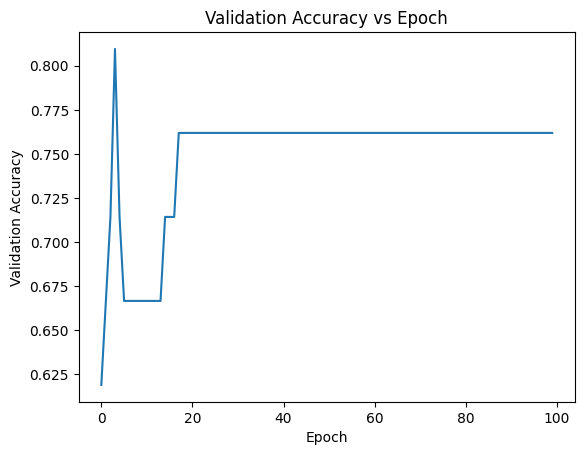

In [ ]:
plt.plot(accs)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epoch')

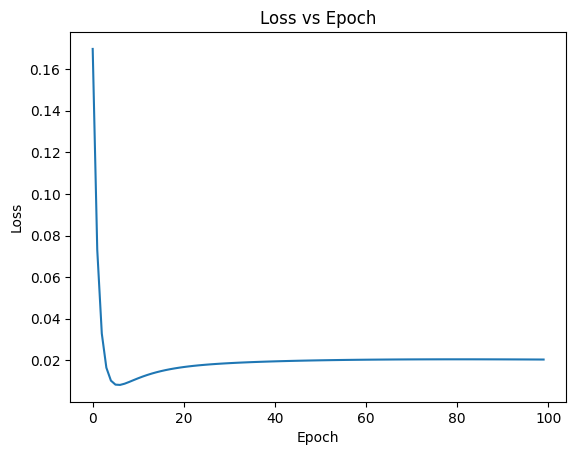

In [ ]:
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

Text(0.5, 1.0, 'ROC Curve')

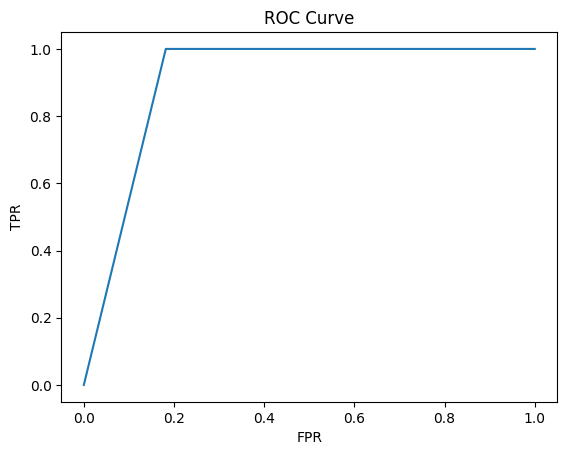

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(np.argmax(dataset[3],axis=0), np.argmax(Y_pred, axis=0))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [ ]:
#AUC
from sklearn.metrics import auc
print("Accuracy: ", accuracy(Y_final,dataset[3])*100,"%")
print(f'Specificity: {Specificity}, Sensitivity: {Sensitivity}')
print("AUC = ",auc(fpr, tpr))

Accuracy:  91.30434782608695 %
Specificity: 1.0, Sensitivity: 1.0
AUC =  0.9090909090909091
